# Assignment 3: Times Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from pylab import rcParams

## Female Births in 1959 from California

### The 'Daily Total Female Births' dataset is read in and simple analysis is performed.  There are just two fields - date and number of births.  The dataset contains a years worth of 1959 data giving the daily number of female births.  There are no missing values. The average number of daily births is 42, and the median number is 42.  The number of daily births ranges from 23 to 73, which is a fairly wide range. The histogram shows that the data is normally distributed.

In [2]:
path = 'C:/BAS250/'
births = pd.read_csv(path + 'daily_total_female_births.csv')

In [3]:
# Display top five rows
births.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
# Display last five rows
births.tail()

,Date,Births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [5]:
# Display data types
births.dtypes

Date      object
Births     int64
dtype: object

In [6]:
# Check for missing data
births.isnull().sum()

Date      0
Births    0
dtype: int64

In [7]:
# Display the number of rows and columns
births.shape

(365, 2)

In [8]:
# Display simple statistics
births.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


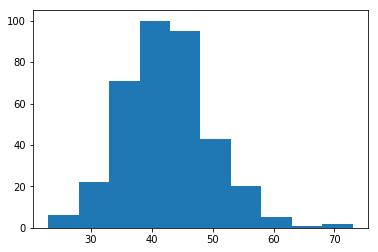

In [9]:
# Plot a histogram
plt.hist(births['Births'], bins=10)
plt.show()

### The date column is converted to a datetime data type and the date is set as the index.  This conversion is necessary for subsequect processing.

In [10]:
# Convert the date column to a datetime object
births['Date'] = pd.to_datetime(births['Date'])

In [11]:
# Display data types
births.dtypes

Date      datetime64[ns]
Births             int64
dtype: object

In [12]:
# Set the date column as the index
births = births.set_index('Date')

In [13]:
# Display top five rows
births.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


### The following are several simple plots.

#### Simple Line Plot of the Number of Births: This shows a rise in the number of births from June through September.

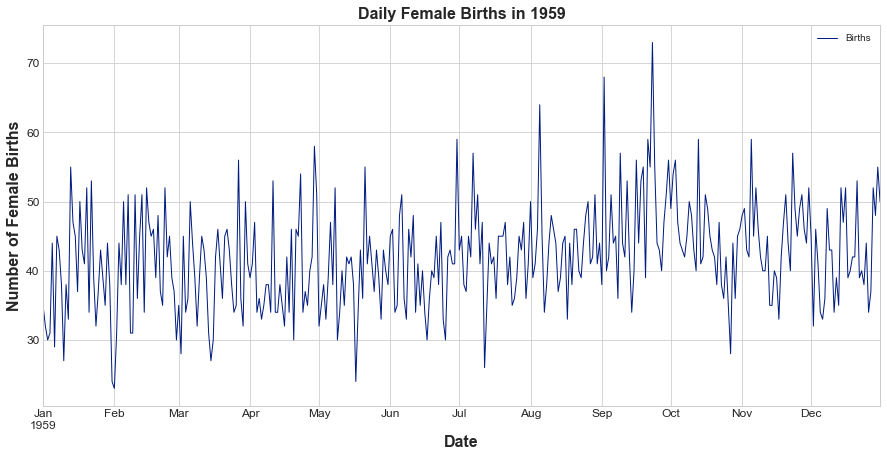

In [14]:
# Plot the data
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-dark-palette')
tsplot = births.plot(figsize=(15,7), fontsize=12, linewidth=1, linestyle='solid')
tsplot.set_xlabel('Date', fontsize=16, fontweight='bold')
tsplot.set_ylabel('Number of Female Births', fontsize=16, fontweight='bold')
tsplot.set_title('Daily Female Births in 1959', fontsize=16, fontweight='bold')
plt.show()

#### The following plot is a rolling mean with a monthly window of 30 days.  It smooths out the line graph allowing you to better see the rise in number of births during the Spring and Summer months

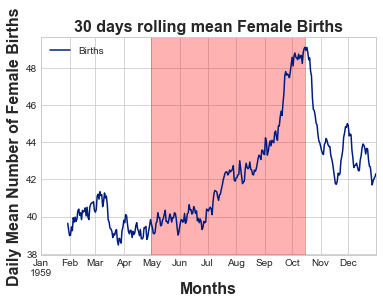

In [15]:
births_mean = births.rolling(window=30).mean()
births_ravg = births_mean.plot()
births_ravg.set_xlabel('Months', fontsize=16, fontweight='bold')
births_ravg.set_ylabel('Daily Mean Number of Female Births', fontsize=16, fontweight='bold')
births_ravg.set_title('30 days rolling mean Female Births', fontsize=16, fontweight='bold')
births_ravg.axvspan('1959-05-01', '1959-10-15', color='red', alpha=0.3)
plt.show()

#### Data is grouped by the birth month and aggregated by the mean.  This is a cleaner presentation of the rise in births starting in May and culminating in September.  It never reaches the low it had in January.

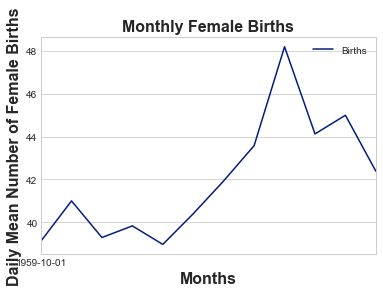

In [16]:
index_month = births.index.month
mean_births_mon = births.groupby(index_month).mean()
births_monthly = mean_births_mon.plot()
births_monthly.set_xlabel('Months', fontsize=16, fontweight='bold')
births_monthly.set_ylabel('Daily Mean Number of Female Births', fontsize=16, fontweight='bold')
births_monthly.set_title('Monthly Female Births', fontsize=16, fontweight='bold')
births_monthly.axvspan('1959-05-01', '1959-10-01', color='red', alpha=0.3)
plt.show()

#### This bar plot is another presentation of the plot above.

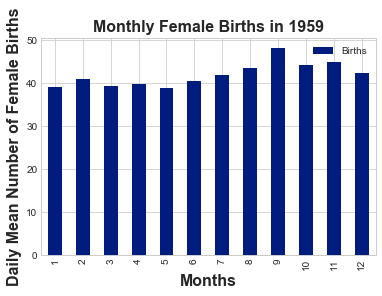

In [17]:
avg_births_mon = births.groupby(index_month).mean()
births_bar = avg_births_mon.plot(kind='bar')
births_bar.set_xlabel('Months', fontsize=16, fontweight='bold')
births_bar.set_ylabel('Daily Mean Number of Female Births', fontsize=16, fontweight='bold')
births_bar.set_title('Monthly Female Births in 1959', fontsize=16, fontweight='bold')
plt.show()

### Auto Correlation Plots and Partial Auto Correlation Plots 

### Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. It  describes how well the present value of the series is related with its past values. A lag of one means the data point is correlated with itself and will have an autocorrelation value of 1.  Auto correlation points close to 1 mean there is a strong correlation between the data points and a the lagged version of itself.  The auto correlation plots have a blue shaded region - the margin of uncertainty, a confidence interval.  Any auto correlation value lying above that area means that the value is statistically significant. 

#### The following two auto correlation plots use a lag of 15 and 30, respectively, corresponding to a half-month of data and month of data. Most of the auto correlation values lie within the margins of uncertainty.  This 'Births' data is not very correlated. There are surprising points at lags of 7 and 21.

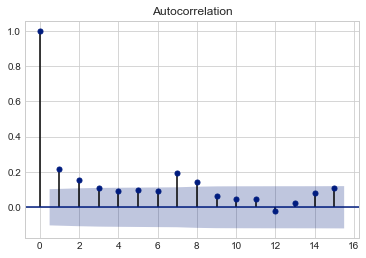

In [18]:
acf_births_15 = tsaplots.plot_acf(births['Births'], lags = 15)
plt.show()

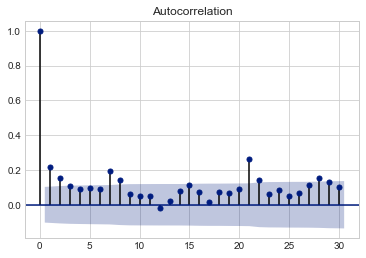

In [19]:
acf_births_30 = tsaplots.plot_acf(births['Births'], lags = 30)
plt.show()

#### The next two plots are partial auto correlation plots also using lags of 15 and 30. This differs from the previous plots.  It finds the correlation of the residuals.  Partial auto corrrelation removes the effects which are already explained by the earlier lags, with the next lag value. Again, most of the points lie within the margin of uncertainty. This 'Births' data is not very correlated. The same two surprising points at lags of 7 and 21 are also in this plot.

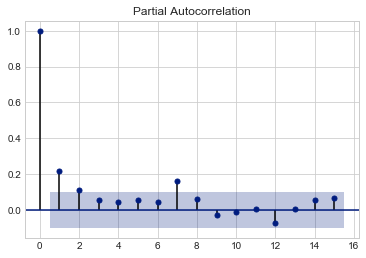

In [20]:
pacf_births_15 = tsaplots.plot_pacf(births['Births'], lags = 15)
plt.show()

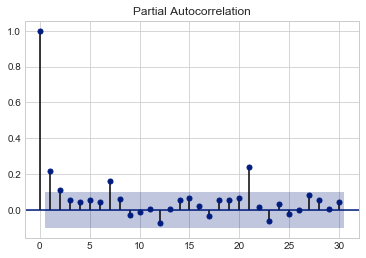

In [21]:
pacf_births_30 = tsaplots.plot_pacf(births['Births'], lags = 30)
plt.show()

### Times series data can be decomposed into seasonality, trend and noise (residuals).  Seasonality refers to data ponts that repeats itself at regualr intervals throughout the period. The trend shows increasing or decreasing data points.  The next three plots show the decomposition of the 'Births' data over the year into seasonality, trend and noise.

In [22]:
decomposition = sm.tsa.seasonal_decompose(births['Births'])

#### This Seasonality plot demonstartes that there is no seasonality in the data set.  Perhaps, if more years of Births data were in the dataset we would see a cycle of increased births during the summer months.

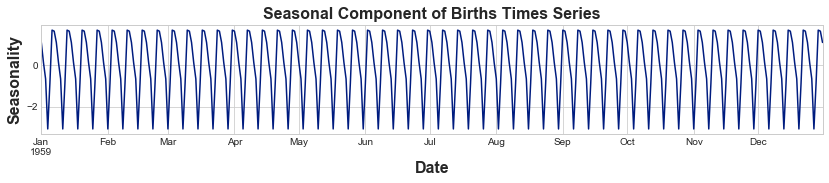

In [23]:
decomp_seasonal = decomposition.seasonal
births_season = decomp_seasonal.plot(figsize=(14,2))
births_season.set_xlabel('Date', fontsize=16, fontweight='bold')
births_season.set_ylabel('Seasonality', fontsize=16, fontweight='bold')
births_season.set_title('Seasonal Component of Births Times Series', fontsize=16, fontweight='bold')
plt.show()

#### This Trend plot shows the trend for the number of births to rise through the Summer, peaking at the start of Fall.

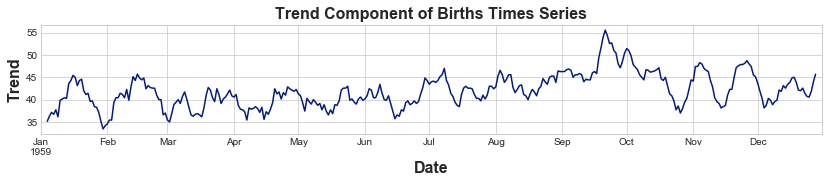

In [24]:
decomp_trend = decomposition.trend
births_trend = decomp_trend.plot(figsize=(14,2))
births_trend.set_xlabel('Date', fontsize=16, fontweight='bold')
births_trend.set_ylabel('Trend', fontsize=16, fontweight='bold')
births_trend.set_title('Trend Component of Births Times Series', fontsize=16, fontweight='bold')
plt.show()

#### The Noise plot is whats leftover in the data after subtracting out the seasonal and trend components. It shows outliers in August and September as the number of births are peaking.

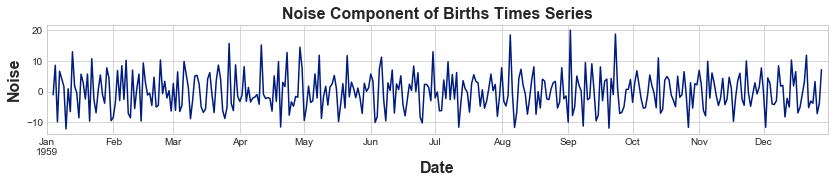

In [25]:
decomp_resid = decomposition.resid
births_resid = decomp_resid.plot(figsize=(14,2))
births_resid.set_xlabel('Date', fontsize=16, fontweight='bold')
births_resid.set_ylabel('Noise', fontsize=16, fontweight='bold')
births_resid.set_title('Noise Component of Births Times Series', fontsize=16, fontweight='bold')
plt.show()

## Minimum Temperatures in Melbourne Australia from 1981-1990

### The 'Daily Minimum Temperatures' dataset is read in and simple analysis is performed.  There are just two fields - date and temperatures.  The dataset contains a 10 years worth of daily minimum temperatures collected from Melbourne Australia.  There are no missing values in the 3650 rows.    The average temperature for this decade is 11 degrees Celsius, and the median number is 11 degrees Celsius, also.  The range of temperatures are from 0 to 26.  How nice, as it never got below freezing.  The histogram shows that the data is normally distributed.

In [26]:
# Read daily_min_temperatures.csv dataset
path = 'C:/BAS250/'
temps = pd.read_csv(path + 'daily_min_temperatures.csv')

In [27]:
# Display top five rows
temps.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [28]:
# Display last five rows
temps.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [29]:
# Display data types
temps.dtypes

Date     object
Temp    float64
dtype: object

In [30]:
# Check for missing data
temps.isnull().sum()

Date    0
Temp    0
dtype: int64

In [31]:
# Display the number of rows and columns
temps.shape

(3650, 2)

In [32]:
# Display simple statistics
temps.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


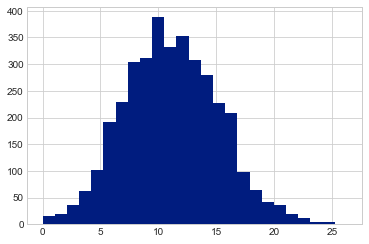

In [33]:
# Plot a histogram
plt.hist(temps['Temp'], bins=25)
plt.show()

### The date column is converted to a datetime data type and the date is set as the index.  This conversion is necessary for subsequect processing. Now, there are two missing dates.  The leap years of 1984 and 1988 include the leap day, but do not include the last day of the year.  This was discovered when I could not get the decomposition code to work properly.  The error message said that the DateTimeIndex did not have a frequency.  So, I gave it a frequency, and it still failed, saying there were missing values.  The frequency code added the two dates, but gave them NaN as values. I used the forward fill option of the fillna function to fix this.

In [34]:
# Convert the date column to a datetime object
temps['Date'] = pd.to_datetime(temps['Date'])

In [35]:
# Display the data types
temps.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [36]:
# Set the date column as the index
temps = temps.set_index('Date')

In [37]:
# Display the top five rows
temps.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [38]:
# Add a daily frequency to the index
temps = temps.asfreq('d')
temps.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3652, freq='D')

In [39]:
# Check for null values
temps[temps["Temp"].isnull()]

,Temp
Date,
1984-12-31,NaN
1988-12-31,NaN


In [40]:
# Use forward fill to fix the dataset
temps = temps.fillna(method='ffill')

In [41]:
# Check for missing data
temps.isnull().sum()

Temp    0
dtype: int64

### The following are several simple plots.


#### Simple Line Plot of the Temperatures: This clearly shows seasonality in the data from year to year.  Each year the summer temperatures are the hottest and winter temperatures are the coldest, as expected.

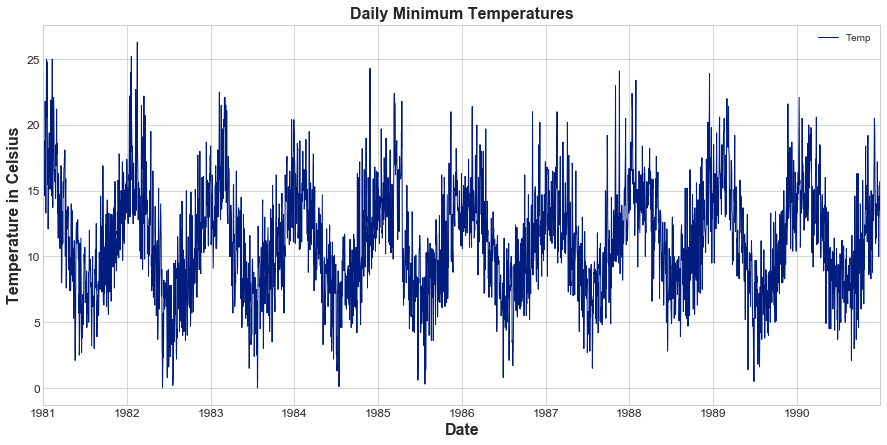

In [42]:
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-dark-palette')
tsplot = temps.plot(figsize=(15,7), fontsize=12, linewidth=1, linestyle='solid')
tsplot.set_xlabel('Date', fontsize=16, fontweight='bold')
tsplot.set_ylabel('Temperature in Celsius', fontsize=16, fontweight='bold')
tsplot.set_title('Daily Minimum Temperatures', fontsize=16, fontweight='bold')
plt.show()

#### The following plot is a rolling mean with a yearly window of 365 days.  It smooths out the line graph allowing you to see that in the mid-1987s that temperatures started to rise sharply.

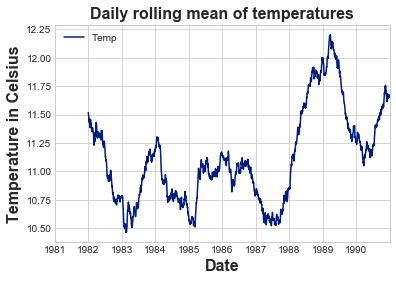

In [43]:
temps_mean = temps.rolling(window=365).mean()
tsplot_mean = temps_mean.plot()
tsplot_mean.set_xlabel('Date', fontsize=16, fontweight='bold')
tsplot_mean.set_ylabel('Temperature in Celsius', fontsize=16, fontweight='bold')
tsplot_mean.set_title('Daily rolling mean of temperatures', fontsize=16, fontweight='bold')
plt.show()

#### Data is grouped by the year and aggregated by the mean.  This shows the spike in 1988.

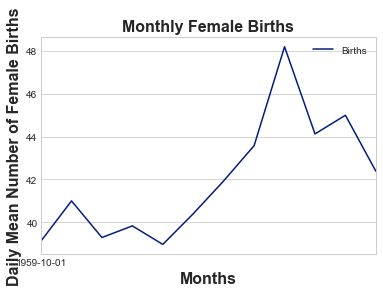

In [44]:
index_month = births.index.month
mean_births_mon = births.groupby(index_month).mean()
births_monthly = mean_births_mon.plot()
births_monthly.set_xlabel('Months', fontsize=16, fontweight='bold')
births_monthly.set_ylabel('Daily Mean Number of Female Births', fontsize=16, fontweight='bold')
births_monthly.set_title('Monthly Female Births', fontsize=16, fontweight='bold')
births_monthly.axvspan('1959-05-01', '1959-10-01', color='red', alpha=0.3)
plt.show()

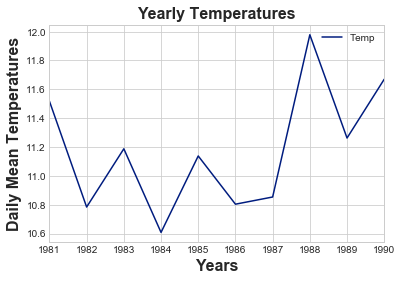

In [45]:
index_yr = temps.index.year
mean_temps_yr = temps.groupby(index_yr).mean()
temps_yrly = mean_temps_yr.plot()
temps_yrly.set_xlabel('Years', fontsize=16, fontweight='bold')
temps_yrly.set_ylabel('Daily Mean Temperatures', fontsize=16, fontweight='bold')
temps_yrly.set_title('Yearly Temperatures', fontsize=16, fontweight='bold')
plt.show()

#### This bar plot is another presentation of the plot above.

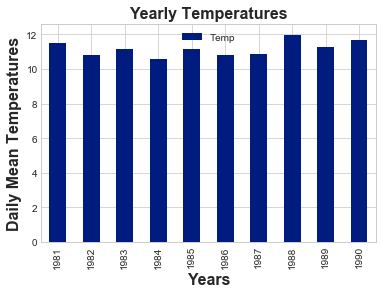

In [46]:
avg_temps_yr = temps.groupby(index_yr).mean()
temps_bar = avg_temps_yr.plot(kind='bar')
temps_bar.set_xlabel('Years', fontsize=16, fontweight='bold')
temps_bar.set_ylabel('Daily Mean Temperatures', fontsize=16, fontweight='bold')
temps_bar.set_title('Yearly Temperatures', fontsize=16, fontweight='bold')
plt.show()

#### The following three auto correlation plots use a lag of 15, 30 and 60, respectively, corresponding to a half-month of data, a month of data and two months od data. All of the auto correlation values lie well above the margins of uncertainty.  This 'Temps' data is very correlated with lagged versions of itself. The correlation values do decrease for larger lag values

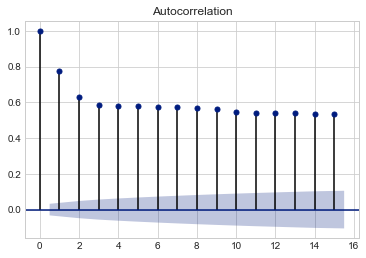

In [47]:
acf_temps_15 = tsaplots.plot_acf(temps['Temp'], lags = 15)
plt.show()

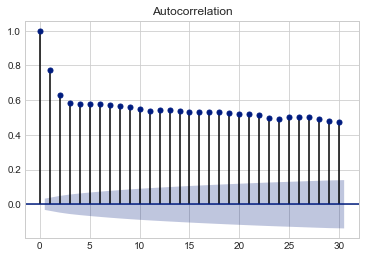

In [48]:
acf_temps_30 = tsaplots.plot_acf(temps['Temp'], lags = 30)
plt.show()

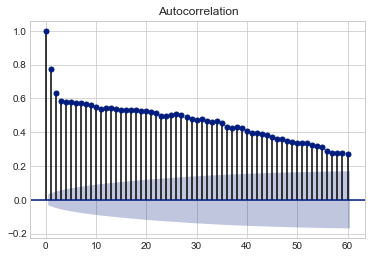

In [49]:
acf_temps_60 = tsaplots.plot_acf(temps['Temp'], lags = 60)
plt.show()

#### The next two plots are partial auto correlation plots also using lags of 15 and 30. With these plots the auto correlation drops off at around lags of 18.

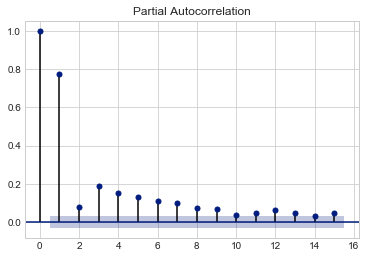

In [50]:
pacf_temps_15 = tsaplots.plot_pacf(temps['Temp'], lags = 15)
plt.show()

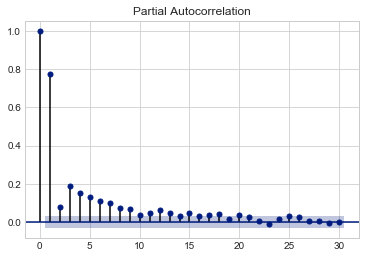

In [51]:
pacf_temps_30 = tsaplots.plot_pacf(temps['Temp'], lags = 30)
plt.show()

### Decomposition

In [52]:
decomposition = sm.tsa.seasonal_decompose(temps['Temp'])

#### This Seasonality plot does not show anything.  Perhaps it means that seasonailty is very strong.  The seasonality of the dataset is obvious from other plots

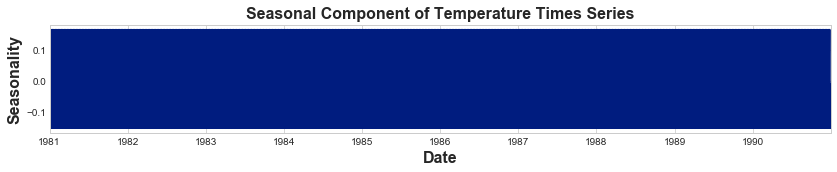

In [53]:
decomp_seasonal = decomposition.seasonal
temps_season = decomp_seasonal.plot(figsize=(14,2))
temps_season.set_xlabel('Date', fontsize=16, fontweight='bold')
temps_season.set_ylabel('Seasonality', fontsize=16, fontweight='bold')
temps_season.set_title('Seasonal Component of Temperature Times Series', fontsize=16, fontweight='bold')
plt.show()

#### This Trend plot seems to show seasonality.

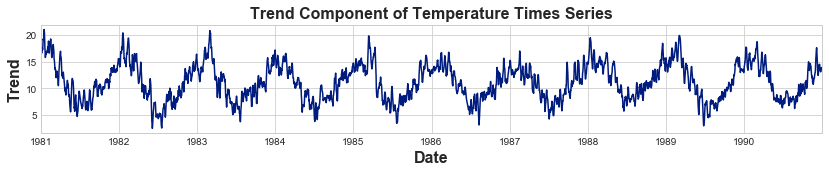

In [54]:
decomp_trend = decomposition.trend
temps_trend = decomp_trend.plot(figsize=(14,2))
temps_trend.set_xlabel('Date', fontsize=16, fontweight='bold')
temps_trend.set_ylabel('Trend', fontsize=16, fontweight='bold')
temps_trend.set_title('Trend Component of Temperature Times Series', fontsize=16, fontweight='bold')
plt.show()

#### The Noise plot is whats leftover in the data after subtracting out the seasonal and trend components. It shows outliers in late 1985 and 1987.

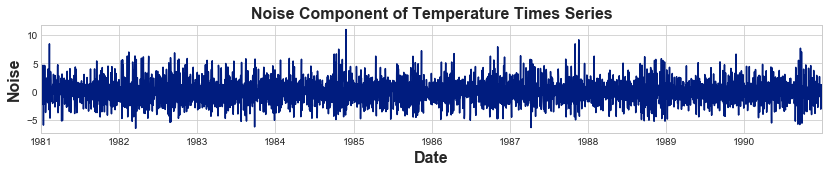

In [55]:
decomp_resid = decomposition.resid
temps_resid = decomp_resid.plot(figsize=(14,2))
temps_resid.set_xlabel('Date', fontsize=16, fontweight='bold')
temps_resid.set_ylabel('Noise', fontsize=16, fontweight='bold')
temps_resid.set_title('Noise Component of Temperature Times Series', fontsize=16, fontweight='bold')
plt.show()